In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the dataset
df = pd.read_csv('german_credit_data.csv')

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


# Data Cleaning

In [4]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
#Remove the null values
df.dropna(inplace = True)

df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,522.000000,522.000000
mean,493.522989,34.888889,1.875479,3278.745211,21.339080
std,291.131014,11.787918,0.682811,2929.155177,12.474079
min,1.000000,19.000000,0.000000,276.000000,6.000000
25%,233.500000,26.000000,2.000000,1297.500000,12.000000
50%,502.500000,31.500000,2.000000,2326.500000,18.000000
75%,736.750000,41.000000,2.000000,3971.250000,26.750000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


# Data Analysis

In [8]:
#1. Find out all the housing where sex is "Male".
df[df['Sex'].str.strip().str.lower() == 'male'][['Sex', 'Housing']].head(10)

,Sex,Housing
3,male,free
4,male,free
7,male,rent
9,male,own
13,male,own
21,male,rent
22,male,rent
23,male,own
25,male,own
28,male,own


In [12]:
#2. Find out the total number of male and female.
df['Sex'].value_counts()

male      354
female    168
Name: Sex, dtype: int64

In [11]:
#3. Find out all the credit, checking and savings account  where sex is "Female".
df[df['Sex'].str.strip().str.lower() == 'female'][['Sex' , 'Credit amount' , 'Checking account' , 'Saving accounts']].head(10)

,Sex,Credit amount,Checking account,Saving accounts
1,female,5951,moderate,little
10,female,1295,moderate,little
11,female,4308,little,little
12,female,1567,moderate,little
14,female,1403,little,little
15,female,1282,little,moderate
18,female,12579,moderate,little
27,female,409,rich,rich
34,female,1474,rich,little
44,female,6143,little,little


In [15]:
#4. Find out all the gender  where Purpose is "Car".
df[df['Purpose'].str.strip().str.lower() == 'car'][['Sex' , 'Purpose']].head(10)

,Sex,Purpose
4,male,car
7,male,car
9,male,car
10,female,car
13,male,car
14,female,car
18,female,car
22,male,car
23,male,car
32,male,car


# Data Visualization

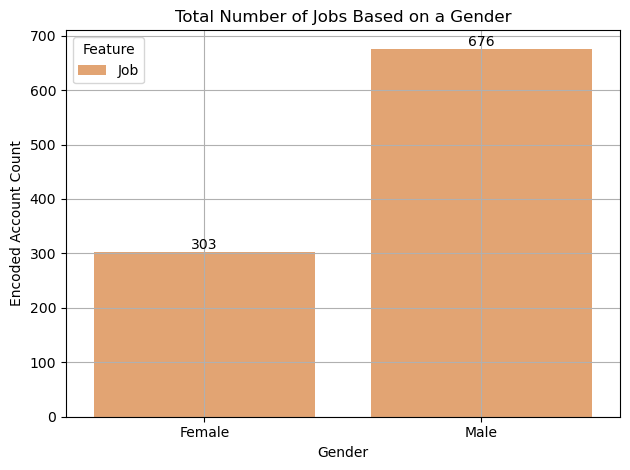

In [77]:
#1. Find out the jobs based on a gender.
# Prepare data
dfm = df[['Sex', 'Job']].dropna()
dfm = dfm.apply(LabelEncoder().fit_transform)
dfm['Sex'] = dfm['Sex'].map({0: 'Female', 1: 'Male'})

#Plot 
melted = pd.melt(dfm.groupby('Sex').sum().reset_index(), id_vars='Sex', var_name='Feature', value_name='Value')
ax = sns.barplot(data=melted, x='Sex', y='Value', hue='Feature', palette=['#f4a261', '#2a9d8f'])
ax.bar_label(ax.containers[0])
plt.title('Total Number of Jobs Based on a Gender')
plt.xlabel('Gender')
plt.ylabel('Encoded Account Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#In the above graph, the "Male" has the highest number of jobs than "Female".

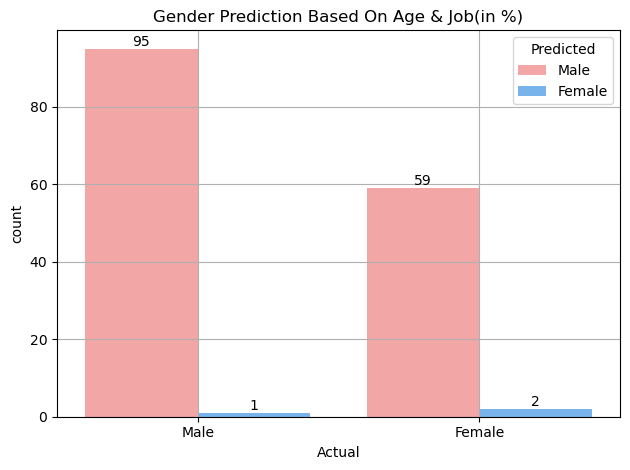

In [94]:
#2. Compare the Gender Prediction based on Age and Job(in %).
dfm = df[['Age', 'Job', 'Sex']].dropna().apply(LabelEncoder().fit_transform)
X_train, X_test, y_train, y_test = train_test_split(dfm[['Age', 'Job']], dfm['Sex'], test_size=0.3, random_state=42)
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).replace({0: 'Female', 1: 'Male'})
ax = sns.countplot(data=res, x='Actual', hue='Predicted', palette=['#ff9999', '#66b3ff'])
[ax.bar_label(c) for c in ax.containers]
plt.title('Gender Prediction Based On Age & Job(in %)')
plt.tight_layout()
plt.grid()
plt.show()

#In the above graph, the "Male" has the highest number of jobs based on age than "Female".

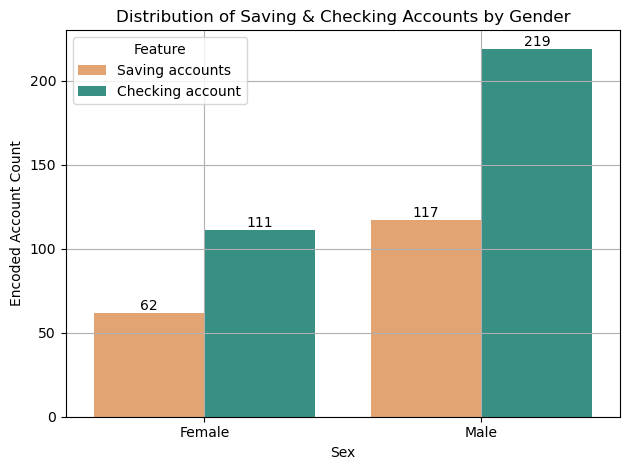

In [89]:
#3.Find the Distribution of Savings and Checking Account based on a gender.
# Prepare data
dfm = df[['Sex', 'Saving accounts', 'Checking account']].dropna()
dfm = dfm.apply(LabelEncoder().fit_transform)
dfm['Sex'] = dfm['Sex'].map({0: 'Female', 1: 'Male'})

#Plot 
melted = pd.melt(dfm.groupby('Sex').sum().reset_index(), id_vars='Sex', var_name='Feature', value_name='Value')
ax = sns.barplot(data=melted, x='Sex', y='Value', hue='Feature', palette=['#f4a261', '#2a9d8f'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of Saving & Checking Accounts by Gender')
plt.ylabel('Encoded Account Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#In the above graph, the "Male" has the highest number of Savings and Checking Amount than "Female".

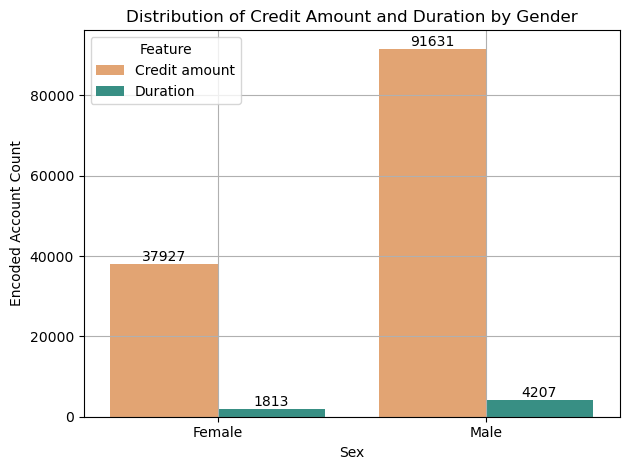

In [95]:
#4. Find the Distribution of Credit Amount and Duration based on a gender.
# Prepare data
dfm = df[['Sex', 'Credit amount', 'Duration']].dropna()
dfm = dfm.apply(LabelEncoder().fit_transform)
dfm['Sex'] = dfm['Sex'].map({0: 'Female', 1: 'Male'})

#Plot 
melted = pd.melt(dfm.groupby('Sex').sum().reset_index(), id_vars='Sex', var_name='Feature', value_name='Value')
ax = sns.barplot(data=melted, x='Sex', y='Value', hue='Feature', palette=['#f4a261', '#2a9d8f'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of Credit Amount and Duration by Gender')
plt.ylabel('Encoded Account Count')
plt.grid(True)
plt.tight_layout()
plt.show()

#In the above graph, the "Male" has the highest number of Credit Amount within Duration than "Female".

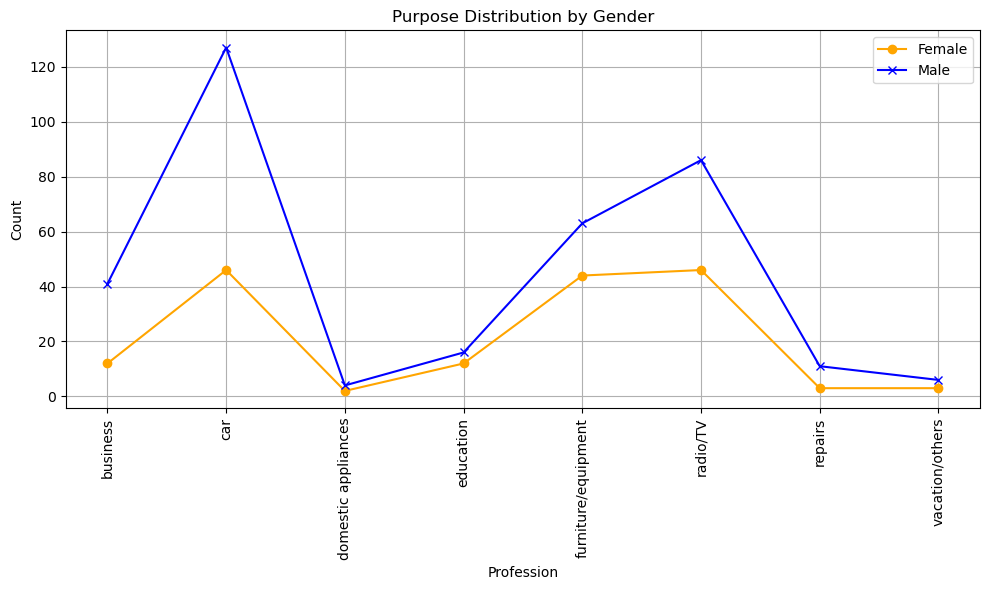

In [96]:
#5. Find out the purposes based on a gender?
dfm = df[['Sex', 'Purpose']].dropna()
dfm['Sex'] = LabelEncoder().fit_transform(dfm['Sex'])
counts = dfm.groupby(['Purpose', 'Sex']).size().unstack(fill_value=0)
female, male = counts[0], counts[1]

plt.figure(figsize=(10, 6))
plt.plot(purposes, female, 'o-', label='Female', color='orange')
plt.plot(purposes, male, 'x-', label='Male', color='blue')
plt.title('Purpose Distribution by Gender')
plt.xticks(rotation=90)
plt.xlabel('Profession')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion

#In the above line graph, Males has a significantly higher count in car, radio/TV, and furniture/equipment as compared to females.

Thank You!